In [45]:
import gym
import numpy as np
import sys
import math
import matplotlib.pyplot as plt

In [46]:
env = gym.make('FrozenLake8x8-v1',is_slippery=True)
env.reset()
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [47]:
print("Action space:",env.action_space)
print("Observation space:",env.observation_space)
print(env.env.P[0][0])

Action space: Discrete(4)
Observation space: Discrete(64)
[(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 8, 0.0, False)]


In [48]:
# Making the Value Iteration function
def value_iteration(env, max_iterations=100000, lmbda=0.9):
    stateValue = [0.0 for i in range(env.nS)]
    newStateValue = stateValue.copy()
    for i in range(max_iterations):
        for state in range(env.nS):
            action_values = []      
            for action in range(env.nA):
                state_value = 0
                possible_outcomes = env.P[state][action]
                # Looping through all possible outcomes
                for j in range(len(possible_outcomes)):
                    prob, next_state, reward, done = possible_outcomes[j]
                    # Calculating discounted return for a particular state, action and outcome
                    state_action_value = prob * (reward + lmbda*stateValue[next_state])
                    # Cumulating discounted returns
                    state_value += state_action_value
                action_values.append(state_value)      #the value of each action
            best_action_value = max(action_values)  # choose the action which gives the maximum value
            newStateValue[state] = best_action_value  #update the value of the state
        if(i>1000): # Minimum of 1000 iterations
            if sum(newStateValue) - sum(stateValue) < 1e-06:   # if there is negligible difference break the loop
                print(i)
                break
            else:
                stateValue = newStateValue.copy()
    return stateValue

In [49]:
stateValues = value_iteration(env)
print(stateValues)

1111
[0.0064108912815232085, 0.00854794697951718, 0.012300317286384527, 0.017789320550647733, 0.025082046498299933, 0.03247080333189779, 0.0395712562509592, 0.04297836235696054, 0.006023903411765516, 0.007644977030444534, 0.01091149443628938, 0.016426432658884448, 0.026054028163411163, 0.036194005596881046, 0.04935462054488879, 0.05730453374806438, 0.005090083214914669, 0.005853053829178521, 0.006775210743408158, 0.0, 0.025570762558790244, 0.03882131363621707, 0.0676396603966135, 0.08435600477559718, 0.004225449498432062, 0.004769395452182863, 0.005819570561396816, 0.007854034453089, 0.020360582903621444, 0.0, 0.09175495298189552, 0.12919105827841182, 0.0031807826859803815, 0.0031964683940820656, 0.002704796110223013, 0.0, 0.03444385339956883, 0.06195140385421746, 0.10901916262624436, 0.2096908845050669, 0.001868960492726569, 0.0, 0.0, 0.010850772035126206, 0.03250088878868907, 0.06304169177085218, 0.0, 0.3600877011155629, 0.0011802425517389897, 0.0, 0.0013771200869944838, 0.0036683633

In [50]:
# Determining the policy from given stateValues
def get_policy(env,stateValue, lmbda=0.9):
    policy = [0 for i in range(env.nS)]
    for state in range(env.nS):
        action_values = []
        for action in range(env.nA):
            action_value = 0
            for i in range(len(env.P[state][action])):
                prob, next_state, r, _ = env.P[state][action][i]
                action_value += prob * (r + lmbda * stateValue[next_state])
            action_values.append(action_value)
        # Determining the best action from maximum state action values
        best_action = np.argmax(np.asarray(action_values))
        policy[state] = best_action # Setting the best action as policy for that state
    return policy 

In [51]:
policy = get_policy(env, stateValues)
print(np.reshape(policy, (8,8)))

[[3 2 2 2 2 2 2 2]
 [3 3 3 3 2 2 2 1]
 [3 3 0 0 2 3 2 1]
 [3 3 3 1 0 0 2 1]
 [3 3 0 0 2 1 3 2]
 [0 0 0 1 3 0 0 2]
 [0 0 1 0 0 0 0 2]
 [0 1 0 0 1 1 1 0]]


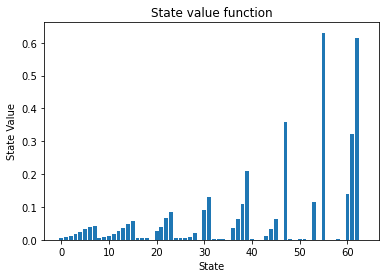

In [52]:
xAxis = [i for i in range(64)]
yAxis = stateValues
plt.bar(xAxis, yAxis)
plt.xlabel("State")
plt.ylabel("State Value")
plt.title("State value function")
plt.show()

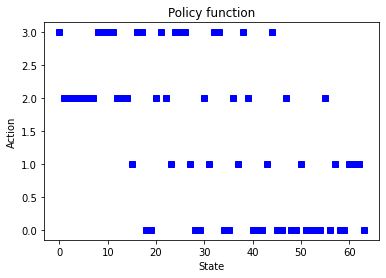

In [53]:
xAxis = [i for i in range(64)]
yAxis = policy
plt.plot(xAxis, yAxis, 'bs')
plt.xlabel("State")
plt.ylabel("Action")
plt.title("Policy function")
plt.show()

In [75]:
def run_simulation(env, policy, episodes):
    misses = 0
    steps_list = []
    progress = 0.0
    avg_steps = []
    miss_rate = []
    for ep in range(episodes):
        state = env.reset()
        steps = 0
        while True:
            action = policy[state]
            state, reward, done, _ = env.step(action)
            steps+=1
            if(done and reward==1):
                steps_list.append(steps)
                avg_steps.append(sum(steps_list)/len(steps_list))
                break
            elif(done and reward==0):
                misses+=1
                
                break
        miss_rate.append(misses/(ep+1))
        curr_progress = ep*100/episodes
        if(curr_progress-progress>=0.1):
            sys.stdout.write('\r')
            sys.stdout.write(f"Completed: {ep*100/episodes}%")
            sys.stdout.flush()
            progress = curr_progress
    print("\n###########################_YOUR_SCORE_###########################")
    print("Average number of steps taken:",sum(steps_list)/len(steps_list))
    print("Percentage of misses:",misses*100/episodes)
    print("Minimum number of steps:", min(steps_list))
    
    xAxis = [i for i in range(len(steps_list))]
    yAxis = avg_steps
    plt.plot(xAxis, yAxis)
    plt.xlabel("Episodes")
    plt.ylabel("Avg. Steps")
    plt.title("Average steps taken")
    plt.show()
    
    xAxis = [i for i in range(episodes)]
    yAxis = miss_rate
    plt.plot(xAxis, yAxis)
    plt.xlabel("Episodes")
    plt.ylabel("Miss rate")
    plt.title("Average number of misses")
    plt.show()

Completed: 99.97%
###########################_YOUR_SCORE_###########################
Average number of steps taken: 71.86809485313931
Percentage of misses: 25.78
Minimum number of steps: 15


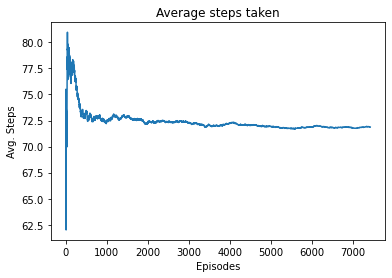

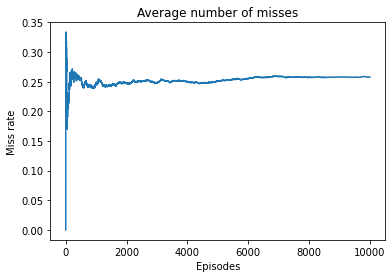

In [77]:
run_simulation(env,policy,10000)